<center><h1> IFT-6758  Data Science  </h1></center>
<center><h2> Fall - 2020 </h2></center> 
<center><h3> Homework - 1</h3></center> 



[Notebook](https://colab.research.google.com/drive/10YQ90z1TM36VJE-1PQ1FnqgjNMpdfiqA) due October 11, 2020 at [23.59 EDT](https://www.worldtimebuddy.com/?qm=1&lid=6077243&h=6077243&date=2020-10-11&sln=23-24) as **PDF** on [Gradescope](https://www.gradescope.com/courses/179325/assignments/714271)


In [139]:
#@title Imports (Run this cell first)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

path = 'https://raw.githubusercontent.com/Jhelum-Ch/DataScience_IFT6758/gh-pages/media/{}'

## Data Wrangling

#### Q1

**7 points** = $(2 + 2 + 1 + 2)              $

Given below is the code to load a dataset with the population of different geographical regions in Canada. 

(a) Visualize the distribution of the `population` column using an appropriate histogram. Does the distribution resemble any well-known distribution? What aspect of the data causes this shape of the distribution?

(b) A common strategy is to transform the data to bring it closer to a better distribution. Try out the following transformations and *visually* determine if any of them lead it closer to another well-known distribution. **Name the distribution(s) if it is different from (a)**:

> 1.   $\sqrt{population}$
> 2.   $log_{10}(1+population)$

(c) What difference do you think the above `log` transfomation makes with `1 + population` as opposed to `population`?

(d) Try out the same `log` transfomation in (c) with different values of the base of the `log`. What difference do you observe when you change the base? 



In [140]:
pop_df = pd.read_csv(path.format('canada-population.csv'))
pop_df.head()

,geo_code,geo_name,geo_type,population,land_area
0,1,Canada,NaN,33476688.0,8.965121e+06
1,1001101,"Division No. 1, Subd. V (N.L.)",SNO,62.0,8.941406e+02
2,1001105,Portugal Cove South (N.L.),T,160.0,1.140000e+00
3,1001113,Trepassey (N.L.),T,570.0,5.580940e+01
4,1001120,St. Shott's (N.L.),T,81.0,1.135900e+00


**Soultion 1 a**



(array([5.222e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([       0. ,  3347668.8,  6695337.6, 10043006.4, 13390675.2,
        16738344. , 20086012.8, 23433681.6, 26781350.4, 30129019.2,
        33476688. ]),
 <a list of 10 Patch objects>)

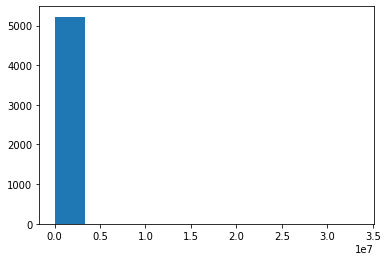

In [141]:
plt.hist(pop_df['population'])

**Comments 1a** : No, The data is skewed more to one side ie it is not uniformly distributed and we are not getting a good histogram plot

**Solution 1 b**

In [142]:
#Solution 1b
pop_df['sqrt_popluation']=np.sqrt(pop_df[['population']].sum(axis=1))
pop_df['1+log10_popluation']=np.log10(1+pop_df['population'])
pop_df.head()

,geo_code,geo_name,geo_type,population,land_area,sqrt_popluation,1+log10_popluation
0,1,Canada,NaN,33476688.0,8.965121e+06,5785.904251,7.524742
1,1001101,"Division No. 1, Subd. V (N.L.)",SNO,62.0,8.941406e+02,7.874008,1.799341
2,1001105,Portugal Cove South (N.L.),T,160.0,1.140000e+00,12.649111,2.206826
3,1001113,Trepassey (N.L.),T,570.0,5.580940e+01,23.874673,2.756636
4,1001120,St. Shott's (N.L.),T,81.0,1.135900e+00,9.000000,1.913814


(array([5.238e+03, 1.300e+01, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([   0.        ,  578.59042508, 1157.18085017, 1735.77127525,
        2314.36170034, 2892.95212542, 3471.54255051, 4050.13297559,
        4628.72340068, 5207.31382576, 5785.90425085]),
 <a list of 10 Patch objects>)

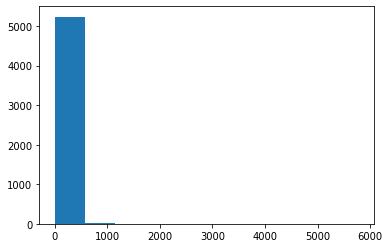

In [143]:
plt.hist(pop_df['sqrt_popluation'])

(array([2.910e+02, 2.430e+02, 6.120e+02, 2.028e+03, 1.418e+03, 4.970e+02,
        1.070e+02, 2.300e+01, 3.000e+00, 1.000e+00]),
 array([0.        , 0.75247425, 1.5049485 , 2.25742275, 3.009897  ,
        3.76237125, 4.5148455 , 5.26731975, 6.019794  , 6.77226825,
        7.5247425 ]),
 <a list of 10 Patch objects>)

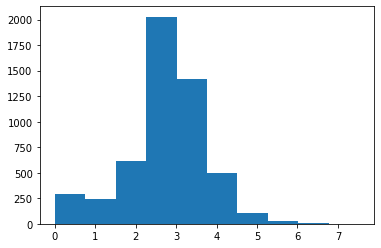

In [144]:
plt.hist(pop_df['1+log10_popluation'])

**Comments 1b**: Taking Sqrt doest not make a huge difference, however doing log transform helped to get a better visualization of  a **normal distribution**

**Solution 1c**

In [145]:
pop_df['log10_popluation_direct']=np.log10(pop_df['population'])
pop_df.head()


,geo_code,geo_name,geo_type,population,land_area,sqrt_popluation,1+log10_popluation,log10_popluation_direct
0,1,Canada,NaN,33476688.0,8.965121e+06,5785.904251,7.524742,7.524742
1,1001101,"Division No. 1, Subd. V (N.L.)",SNO,62.0,8.941406e+02,7.874008,1.799341,1.792392
2,1001105,Portugal Cove South (N.L.),T,160.0,1.140000e+00,12.649111,2.206826,2.204120
3,1001113,Trepassey (N.L.),T,570.0,5.580940e+01,23.874673,2.756636,2.755875
4,1001120,St. Shott's (N.L.),T,81.0,1.135900e+00,9.000000,1.913814,1.908485


**Comments 1c** : As you can see in the above table, it is not making a huge shift in the value. when, 1 is added to the log10 there is a slightly change the fraction

**Solution 1D**

In [146]:

pop_df['log_popluation_direct']=np.log(pop_df['population'])
pop_df['log2_popluation_direct']=np.log2(pop_df['population'])
pop_df.head()

,geo_code,geo_name,geo_type,population,land_area,sqrt_popluation,1+log10_popluation,log10_popluation_direct,log_popluation_direct,log2_popluation_direct
0,1,Canada,NaN,33476688.0,8.965121e+06,5785.904251,7.524742,7.524742,17.326360,24.996653
1,1001101,"Division No. 1, Subd. V (N.L.)",SNO,62.0,8.941406e+02,7.874008,1.799341,1.792392,4.127134,5.954196
2,1001105,Portugal Cove South (N.L.),T,160.0,1.140000e+00,12.649111,2.206826,2.204120,5.075174,7.321928
3,1001113,Trepassey (N.L.),T,570.0,5.580940e+01,23.874673,2.756636,2.755875,6.345636,9.154818
4,1001120,St. Shott's (N.L.),T,81.0,1.135900e+00,9.000000,1.913814,1.908485,4.394449,6.339850


**comments 1d** : as we change the base of the log,  log2>log>log10 . ie log2 have value high comparted to log or log10.

## Exploratory Analysis

####Q2

**9 points** = $(1 + 1.5 + 3 + 2 + 1.5)$

The next cell loads the fancy penguins dataset into a dataframe.

(a) Remove the rows that have `NaN` values for all numerical features except `body_color`. 

(b) In the result obtained in (a), how many penguins have no `body_color` assigned? Replace these `body_color` entries with a string type `unknown` 

(c) Visualize this data in a pair plot and guess the possible `body_color` of the penguins with no species assigned.**Justify** your choice.

(d) Load the dataset afresh again. Replace the `NaN` values present in the the features with their respective *in-class means* for all numerical fields. Example: The  `bill_depth_mm` of an `Adelie	Torgersen` penguins replaced with the mean of `bill_depth_mm` of all the other `Adelie	Torgersen` entries, and so on for all fields. 

(e) Plot the pair plot of this transformed dataset. Make any comment(s) on what you observe here compared to (c).




In [147]:
penguins = pd.read_csv(path.format('fancy-penguins.csv'))

In [148]:
penguins.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,body_color
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,black
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,grey
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,grey
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,grey


**Solution 2 a**

In [149]:
print(penguins.isnull().sum())
penguins.dropna(subset=['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g'],inplace=True)
print(penguins.isnull().sum())

Unnamed: 0            0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
body_color           11
dtype: int64
Unnamed: 0           0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
body_color           9
dtype: int64


**Solution 2b**

In [150]:

penguins['body_color']=penguins['body_color'].replace(np.nan,'unknown',regex=True)
print('NAN are handled and fixed with unknown temporarily',penguins.isnull().sum())


NAN are handled and fixed with unknown temporarily Unnamed: 0           0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
body_color           0
dtype: int64


**Comments 2b**: There are 9 records with NAN values and its been replaced with unknown

**Solution 2c:**

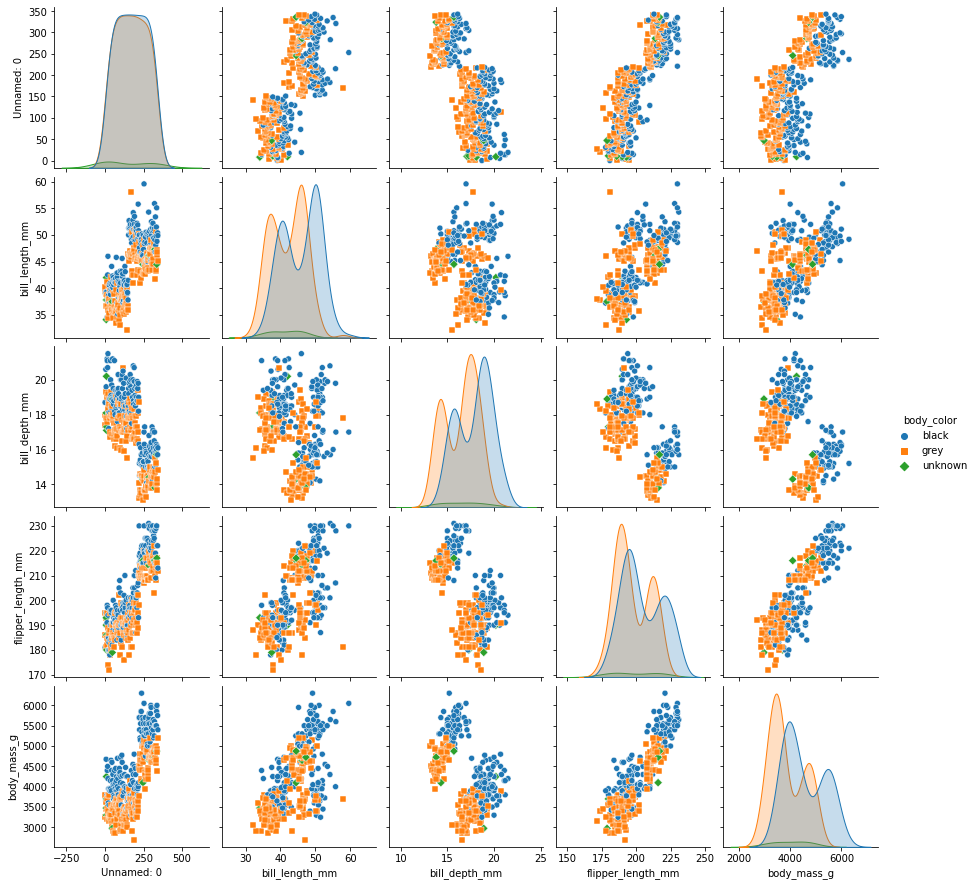

In [151]:
import seaborn as sns
sns.pairplot(penguins, hue="body_color",markers=["o", "s", "D"])


**Comments 2c:** the closest match would be orange for the unknown body color, if we observe the paiplot, the closest points of unknown are orange.

**Solution 2d:**

In [152]:
penguins = pd.read_csv(path.format('fancy-penguins.csv'))
penguins['body_color']=penguins['body_color'].replace(np.nan,'unknown',regex=True)
penguins[penguins.isnull().any(axis=1)]

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,body_color
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,unknown
339,339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,unknown


In [153]:
penguins[['bill_length_mm','bill_depth_mm',
          'flipper_length_mm','body_mass_g']] = penguins[['bill_length_mm','bill_depth_mm',
          'flipper_length_mm','body_mass_g']].fillna(penguins.groupby(['species','island'])[['bill_length_mm','bill_depth_mm',
          'flipper_length_mm','body_mass_g']].transform('mean'))

In [154]:
penguins.isnull().sum()

Unnamed: 0           0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
body_color           0
dtype: int64

**Solution 2e:**

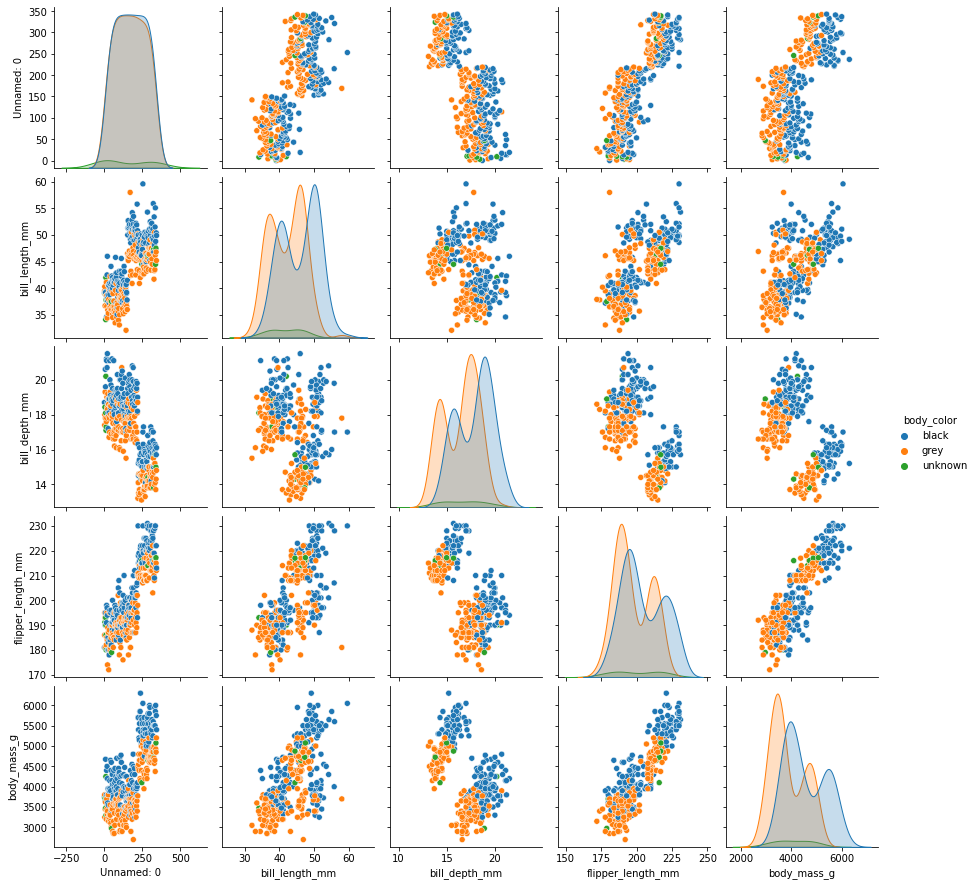

In [155]:

import seaborn as sns
sns.pairplot(penguins, hue="body_color")

**Comments 2e:**  Not a big change as there were only 2 missing values are there in the dataset. Hence the distribution of the plot is almost the same

## Data Visualization

####Q3

**13 points** = $(3*1 + 3*2 + 3 + 1)              $




In this problem, the task is to visualize the data about the number of taxi pickups in a city at different time scales. The dataset contains details of taxi pickups during several months. 

Observe the datatype of the field indicating the trip start timestamp. A lot of information can be extracted from just that string.

(a) Extract the following from the trip start timestamp and add new columns to store them in the dataframe : 
* day of the month (1-31)
* day of the week (Monday-Sunday)
* hour of the day

(b) Produce suitable plots through code to observe the following relationships and give a single line comment about the taxi usage pattern of the city residents in the mentioned context. 

  1. The number of rides by day of the month.
  2. The number of rides by the day of the week. 
  3. The number of hourly rides during the day.
  
(c) On a single plot, depict the taxi usage during different times of the day for cash and credit card rides. Add a suitable legend and label the axes.  

(d) Overall it was noted that there were substantially more credit card rides than cash rides. Is this true throughout the day?

In [156]:
trips = pd.read_csv(path.format('city-taxi.csv'))
trips.head()

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,51e9ac7992f73fe611a658196e8bdedc309c6a9c,148b56c4e0be7f03cac1f44bfd98d7d7cd18b9935d644a...,2013-04-07 17:00:00+00:00,2013-04-07 17:00:00+00:00,NaN,0.0,NaN,NaN,NaN,NaN,39.05,7.81,0.0,0.0,46.86,Credit Card,Chicago Elite Cab Corp.,NaN,NaN,NaN,NaN,NaN,NaN
1,cc1557aa4739cdd8fd2a835b6a5c721bb55387c0,b2b9295effcd71dadf837c7801fd3b8a285f5bdefffb18...,2013-04-07 17:00:00+00:00,2013-04-07 16:45:00+00:00,NaN,0.0,NaN,NaN,NaN,NaN,36.85,7.37,0.0,0.0,44.22,Credit Card,Chicago Elite Cab Corp.,NaN,NaN,NaN,NaN,NaN,NaN
2,0777b61b1d52643224b21afb9bac3d6f0dbc26fd,92c7e4860654a8a87e459b0471572be4266569e48af141...,2013-04-07 14:45:00+00:00,2013-04-07 14:30:00+00:00,NaN,0.0,NaN,NaN,NaN,NaN,9.45,1.89,0.0,0.0,11.34,Credit Card,Chicago Elite Cab Corp.,NaN,NaN,NaN,NaN,NaN,NaN
3,a0d5f5a0306f3ee3f68e18a88eefff8add909a3b,1ab1d8e0fd730376b1bfaf30fadc2901ba10f5ea75a225...,2013-04-20 18:45:00+00:00,2013-04-20 18:45:00+00:00,NaN,0.0,NaN,NaN,NaN,NaN,8.75,1.75,0.0,0.0,10.50,Credit Card,Chicago Elite Cab Corp.,NaN,NaN,NaN,NaN,NaN,NaN
4,02fe736a5c738a58a88fc2fa7ec10ad3f7f979c0,bda6f18f96bd0d6b78f228e56d927386d5b2f5646088d3...,2013-03-30 02:15:00+00:00,2013-03-30 02:15:00+00:00,NaN,0.0,NaN,NaN,NaN,NaN,15.45,4.64,0.0,0.0,20.09,Credit Card,Chicago Elite Cab Corp.,NaN,NaN,NaN,NaN,NaN,NaN


**Solution 3a**

In [158]:
from datetime import datetime as dt
trips['trip_start_timestamp'] = pd.to_datetime(trips['trip_start_timestamp'])

trips['day']=pd.DatetimeIndex(trips['trip_start_timestamp']).day
trips['day_of_week']=trips['trip_start_timestamp'].dt.day_name()
trips['hours']=trips['trip_start_timestamp'].dt.hour

trips[['day','day_of_week','hours']].head()

,day,day_of_week,hours
0,7,Sunday,17
1,7,Sunday,17
2,7,Sunday,14
3,20,Saturday,18
4,30,Saturday,2


**Solution 3b**

In [159]:
trips['month']=trips['trip_start_timestamp'].dt.month
trips.month.unique()

array([4, 3, 5])

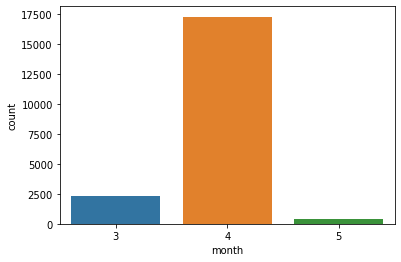

In [160]:
sns.countplot(x='month',data=trips)

**Comments 3 b1:**in the month of April(4), there is high number of rides while 5th month is the lowest

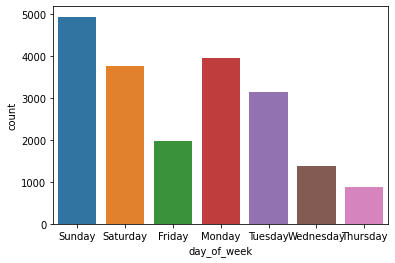

In [161]:
#
sns.countplot(x='day_of_week',data=trips)

**Comments 3 b2:**The number of rides during the Sunday being the highest when compared with other days and Thursday being the lowest

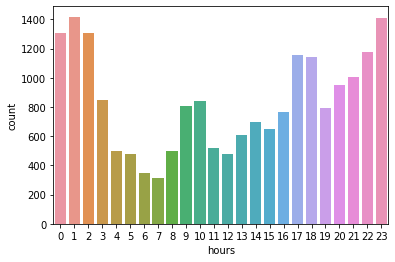

In [162]:

sns.countplot(x='hours',data=trips)


**Comments 3 b3:**During the nightthe taxi using is generally high. i.e. during  23 hours  there is high usage where are in the morning 7 hours being the lowest usage of taxi.

**Solution 3c:**

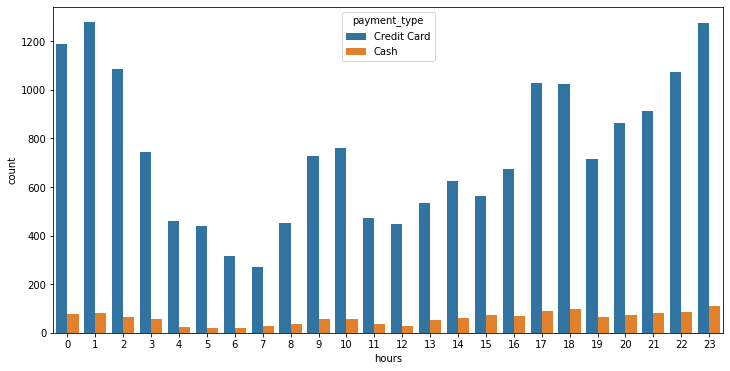

In [163]:
payment=['Credit Card', 'Cash']
temp_df=trips[trips['payment_type'].isin(payment)]
from matplotlib.pyplot import figure, show
figure(figsize=(12,6))
sns.countplot(x='hours',hue='payment_type',data=temp_df)

**Solution 3d:** Yes, throughout the day, people prefer credit card payment to cash.

## K-Nearest Neighbors

####Q4

**8 points** = $(1.5 + 2.5 + 2 + 2)$                

Consider the sample dataset given in the following table which represents samples from the selection for a certain tax-benefit scheme based on credit score (on 800) and annual income of individuals :

**Train set :**

Sample|Score (800)|Income($)|Result|
--|--|--|--|
T1|400|20000|Selected|
T2|200|2000|Rejected|
T3|600|10000|Selected|
T4|100|4000|Rejected|
T5|800|2000|Rejected|
T6|500|10000|Selected|


**Test set :**

Sample|Score (10)|Income($)|Result|
--|--|--|--|
A|200|12000|?|
B|600|2000|?|

(Note: The `Sample` column in the table is merely a unique name for each data sample to reference in the questions and your answers)

Consider a kNN model with k=1 and Euclidean L1 distance as the metric : $$L_1[(x_1, y_2) || (x_2, y_2)] = |x_1 - x_2| + |y_1 - y_2|$$

(a) For the two test samples `A` and `B`, determine the `Result` based on your manual fitting of the above model on the train set.

(b) In the raw data :
*  Convert the `Score` column as a percentage of the maximum possible credit score
*  Subtract the `Income` by the minimum income in the train set and divide the result by the minimum income again. 

Recalibrate your kNN model and determine the `Result` of the model for the predictions of the test samples `A` and `B`.    

(c) Do you see a potential issue with fitting raw data like this to the kNN model? What is a reasonable solution?

(d) You discover many more attributes (features) about the individuals that you can include in your dataset and fit a model. Is kNN still a good choice in this case? **Why/Why not?**

**Solution 4a**

Based on the manual fitting on the train data,

A--> Rejected

B --> Rejected

**Solution 4b**

Sample|Percentage|Income_Scaled|
--|--|--|
T1|0.5|9|
T2|0.25|0|
T3|0.75|4|
T4|0.125|1|
T5|1|0|
T6|0.625|4|

Sample|Percentage|Income_Scaled|Result|
--|--|--|--|
A|0.25|5|?|
B|0.75|0|?|


**Solution 4c**
#A--> Selected
#B--> Rejected
Yes, there is a change in the result in A. Since KNN depends on the distance calculation, when we do the normalization the scores are tweaked and provides better results. Its adviseabe to normalize the data and handle outliers.


**Solution 4d**
As the dimension grows, the KNN model sufferes dimensionality curse. Hence, its good to do reduce the dimensions and only highly contributing feature to the model. So that, we can control the dimensionality curse in KNN algorithms for better performance.

## Decision Trees

#### **Q5**

**5 points** = $(2.5 + 2.5)$

Consider the figure below :

  (a) Sketch the tree corresponding to the partition of the predictor space
illustrated in the left-hand panel. The numbers inside the boxes indicate the
mean of $Y$ within each region.                                                       

  (b) Create a diagram similar to the left-hand panel, using the tree illustrated in the right-hand panel. You should divide up the predictor space into the correct regions, and indicate the mean for each region.

<img width=600 src="https://i.ibb.co/PD3N5Zt/Trees.png" alt="Trees" border="0" /> 


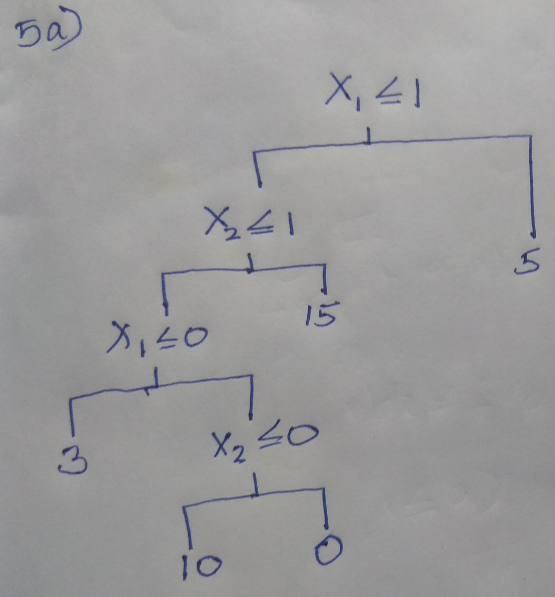

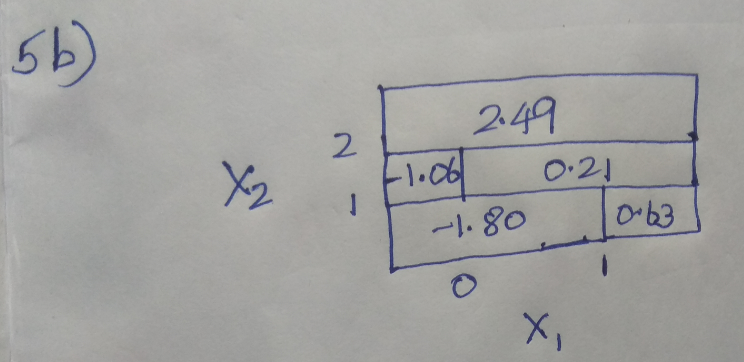

#### **Q6**

**13 points** = $(1 + 1 + 2 + 1.5 + 1.5 + 1.5 + 1.5 + 1 + 1 + 1)$                

Given below is a decision tree generated for a dataset with *150 samples* with :                             

*   features : `['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']`
*   target class labels : `['setosa', 'versicolor', 'virginica']`

The dataset consists of 50 samples per class.

<img width=650 src="https://i.ibb.co/gyLNf1v/decision-tree-figure.png" alt="Trees" border="0" /> 

Based on this particular decision tree, answer the following questions:

(a) Which among the 4 features do you think is the least significant in determining the class of the input data? **Why**?

(b) Which among the 4 features do you think is the most important in determining the class of the input data? **Why**?

(c) For each of the 3 classes, give approximate ranges of the feature values that are characteristic of the class based on the region in the partition space where a sample would **most likely occur** in the feature space (compared to other partitions). 
(Note: Need not specify all 4 features, only those that help identify the *most likely feature characteristics* are sufficient) 

(d) Why do some nodes have a gini index of 0 while the others do not?

(e) What are the possible class(es) you classify the flowers with the following description into?:
1.  smaller sepals and petals  (width and length < 3.5)
2.  longer sepals and wider petals (petals wider than 2 cm)   

(f) The field `value` actually represents the *number of samples of each class* `[#sentosa_samples, #versicolor_samples, #virginica_samples]` classified by the tree based on the given training dataset with 150 samples. With this in mind, determine the **number of samples in the training dataset that were classified into each class**. (`[setosa, versicolor, virginica] = [__, __, __]`)

(g) What is the *class-wise training accuracy* of the classification done by this tree? (training accuracy of each class)

(h) What is the *overall training accuracy* of this model?

(i) Do you think that this tree is overfitting the data? How would you determine it?  

(j) If you were required to fit a decision tree with lower variance, what change would you propose in the above tree?

**Solution 6a:** The least significant--> sepal width, based on the decision tree diagram it is in depth 3 so very less data point would be splited based on this node.

**Solution 6b:** Important Feature--> Petal Length, it is the root node and every split in the data point happens through this node.

**Solution 6c**: if petal length<=2.45 then setosa

if sepal length(cm)<=6.15 and petal length(cm)<=4.75 then vesicolor

if sepal length(cm) **not** <=6.15 and petal width(cm) **not** <= 1.75 then Virginica

**Solution 6d:** gini represents the purity of the node/leaf. If gini =0 , then it means the node is pure while the other node has some other class/misclassified

**Solution 6e:**

1. Versicolor

2. Virginica

**Solution 6f:** [setosa, versicolor, virginica] =  [50,50,50]

**Solution 6g:** Setosa=(50/50)*100 =100%

Versicolor=(49/50)*100=98%

Virginica=(47/50)*100=94%

**Solution 6h:** (correctly predicted/Total data points)=(147/150)*100=97.3%

**Solution 6i:** Yes, In the depth-4, the leaves have less samples and try to memorize to the training data. Hence it results in overfitting

**Solution 6j:** By pre-Purning the growth of the tree earlier so that the model generalize to the data rather than memorizing to the training data. By adjusting the max-depth parameter, we can control the over fitting in decision tree. I think, in the depth 3 we can stop the decision tree

## Linear Regression

####**Q7**

**12 points** = $(1 + 2 + 1 + 2 + 1.5 + 1.5 + 2 + 1)$                           

You are building a model of bike rental demand, to help a city plan its
transit services. After analyzing the dataset, you make the following plot,

  <img width=600 src="https://i.ibb.co/n3Tpy6J/bike-rentals-by-time-of-day.png"/>

  The x-axis shows the time of day ($x$), and the y-axis gives the **average** number of bike rentals ($\bar{y}$), both of which are derived from a dataset containing the instantaneous number bike rentals at a city location for different times of the day with the resolution in minutes. Note that you only plot the average number of bike rentals for the purpose of visualization. For fitting a model, you use the raw $x$ and $y$ available in the dataset.  

The software architects of this project are very persistent on using a linear model for this demand prediction due to computational constraints and to ensure swift processing. Answer the following questions based on this.


  (a) You first feel the impulse to fit the model, $$y
= \beta x + \epsilon.$$ Is it a good idea to do so? Why/Why not? 


  (b) Propose a good way to represent the time of day feature variable (x-axis) to include in the regression. **Justify** your choice.

  (c) A data scientist in your team proposes to include an additional feature variable $x_d$ which is set to 1 for *weekday* (Mon-Fri) and 0 for *weekend* (Sat-Sun). Explain what could possibly be the basis of this choice.  

  (d) You fit a linear model for the dataset that is augmented with the addition variable $x_d$ as proposed in (c) above as $y = \beta x + \beta_d x_d + \epsilon$. The regression coefficient of this model is $\beta_d$. Intuitively explain what the parameter $\beta_d$ would end up representing in **this specific** fitted linear model.  

  (e) When a linear model is fit separately for the *weekday* and *weekend* data, which one among the two (weekday/weekend) will produce a better fit model? Why?

  (f) For the **weekend** data, you realize that you can split the input domain into specific ranges and fit separate linear models to get better results. Outline a good possible set of ranges to split the input for the *weekend* data. 

  (g) Motivated by this approach, you realize you can include basis functions in your
regression even for the **weekday** data. Suggest one possible set of basis functions you might include in this regression. What is the idea behind your choice?

  (h) Describe one way that you would use to avoid your linear model from overfitting the bike rental data.



**Solution a:**No, based on the graph pattern, it follows higher degree of polynomial family equation. A straight line will not capture the trend well

**Solution b:** I propose to rollup the dataset to the day level to fit in the regression.

**Solution c:** It is a part of preprocessing, to capture the trend well. Based on the graph, during the weekends the pattern of the usage is completely different form the weekday

**Solution d:** $\beta_d$ detemines the imporantance of the feature and the slope $x_d$. $\beta_d$ is a scalar value. Specifically $\beta_d$ detemines the correlation of $x_d$ with the bike rental demand.


**Solution e:** Weekday will provide a better results when compared to weekend.Because, the weekend pattern is almost parabolic which can never fit with a straight line. 

**Solution f:** the split would be 6:00 AM to 2:00 PM, if we disect the graph for this timeline, we can get a line, for which the model will perform well to get better result

**Solution g:**  we can use the non-linear basis function, where $f(x)=h(x)^T \beta$.

where h(x) can be, $(x^2,x_d^2,xx_d)$. it will map it to higher dimension(3D), where it can be linearly seperable.

**Solution h** To avoid overfitting, we can add more data or else we can use regularization which will penalize higher degree of model so that our model wont overfit.